In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

C:\Users\Shradha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
X = []
Y = []

for i in tqdm(glob("train/Open_Eyes/**")):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob("train/Closed_Eyes/**")):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)    

100%|██████████| 2000/2000 [00:44<00:00, 45.05it/s] 


In [4]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [5]:
X.shape

(4000, 64, 64)

In [6]:
X = np.expand_dims(X,-1)

In [7]:
X.shape

(4000, 64, 64, 1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [10]:
model =tf.keras.models.Sequential([
    Input(shape=(64,64,1)),
    
    
    Conv2D(filters=32,kernel_size=5,strides=1,activation='relu'),
    Conv2D(filters=32,kernel_size=3,strides=1,activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    
    
    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'),
    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    
    
    Flatten(),
    Dense(units = 256,activation ='relu',use_bias=False),
    BatchNormalization(),
    
    Dense(units=128,use_bias=False,activation='relu'),

    
    Dense(units=84,use_bias=False,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=1,activation='sigmoid')

])

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert TensorFlow tensors to NumPy arrays
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

# Use train_test_split to create validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_np, y_train_np, test_size=0.2, random_state=42)

# Rest of your code remains unchanged
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=32, callbacks=[callback])

Epoch 1/30


67/67 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9613
Epoch 1: val_loss improved from inf to 0.80698, saving model to bestModel.h5


C:\Users\Shradha\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 33s 412ms/step - loss: 0.1088 - accuracy: 0.9613 - val_loss: 0.8070 - val_accuracy: 0.4832
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9851
Epoch 2: val_loss did not improve from 0.80698
67/67 [==============================] - 48s 720ms/step - loss: 0.0527 - accuracy: 0.9851 - val_loss: 1.4348 - val_accuracy: 0.4832
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9911
Epoch 3: val_loss did not improve from 0.80698
67/67 [==============================] - 35s 528ms/step - loss: 0.0333 - accuracy: 0.9911 - val_loss: 2.6387 - val_accuracy: 0.4832
Epoch 4/30
67/67 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9888
Epoch 4: val_loss did not improve from 0.80698
67/67 [==============================] - 21s 312ms/step - loss: 0.0306 - accuracy: 0.9888 - val_loss: 1.9770 - val_accuracy: 0.4832
Epoch 5/30
67/67 [==============================]

67/67 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9986
Epoch 30: val_loss did not improve from 0.00063
67/67 [==============================] - 22s 331ms/step - loss: 0.0030 - accuracy: 0.9986 - val_loss: 0.0414 - val_accuracy: 0.9925


In [13]:
model.evaluate(x_val, y_val)

17/17 [==============================] - 2s 88ms/step - loss: 0.0414 - accuracy: 0.9925


[0.04144023731350899, 0.9925373196601868]

In [14]:
from keras.models import load_model
best_model = load_model('bestModel.h5')
best_model.evaluate(x_val, y_val)

17/17 [==============================] - 2s 107ms/step - loss: 6.2655e-04 - accuracy: 1.0000


[0.000626549415756017, 1.0]

1/1 [==============================] - 0s 361ms/step


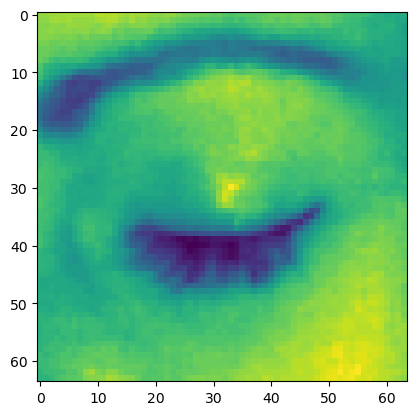

Closed
1/1 [==============================] - 0s 22ms/step


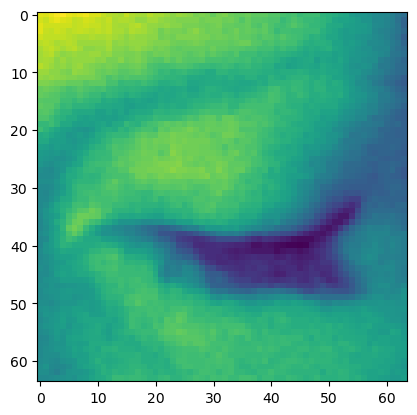

Closed
1/1 [==============================] - 0s 39ms/step


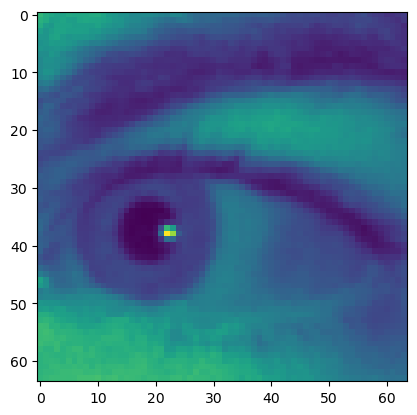

Open
1/1 [==============================] - 0s 41ms/step


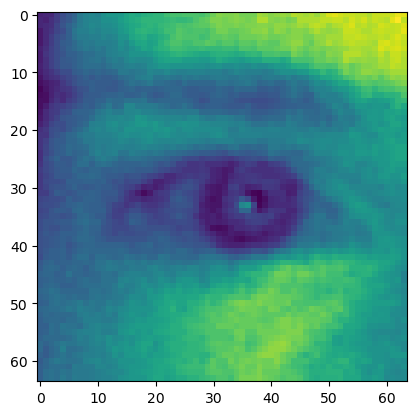

Open
1/1 [==============================] - 0s 34ms/step


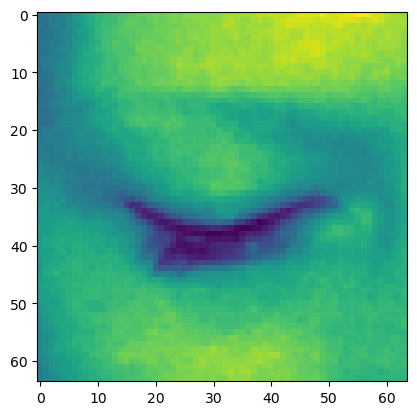

Closed


In [15]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print('Closed')

17/17 [==============================] - 2s 88ms/step


Text(0.5, 25.722222222222214, 'Actual')

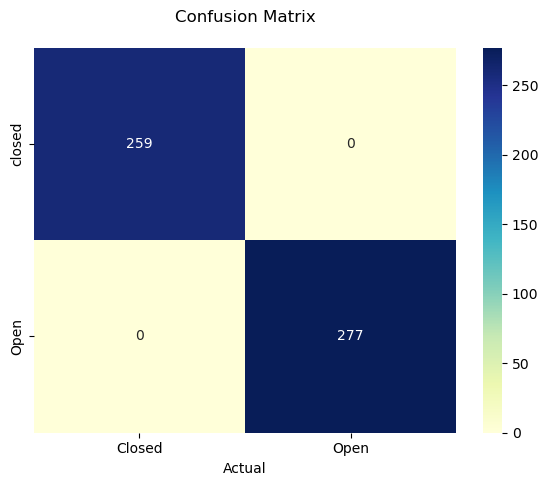

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15,5))

preds = best_model.predict(x_val)
preds =(preds >= 0.5).astype(np.int32)
cm=confusion_matrix(y_val,preds)
df_cm=pd.DataFrame(cm,index=['closed','Open'], columns=['Closed','Open'])
plt.subplot(121)
plt.title("Confusion Matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Actual")

In [17]:
accuracy =best_model.evaluate(x_val,y_val)[1]
print("Accuracy:",accuracy)

17/17 [==============================] - 2s 94ms/step - loss: 6.2655e-04 - accuracy: 1.0000
Accuracy: 1.0


In [18]:
model_json = model.to_json()
with open('model_a.json',"w") as json_file:
    json_file.write(model_json)